In [30]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Evaluate models

In [36]:
EVALUATION_FILES = [f"../../models/simple_classifier_{x}_evaluation.csv" for x in range(100, 550, 50)]

for evaluation_file in EVALUATION_FILES:
    print(evaluation_file)
    df = pd.read_csv(evaluation_file)
    
    y_test = df["price_category"]
    y_pred = df["predicted_price_category"]
    y_proba = df[
        ["price_category_prob_0",
         "price_category_prob_1",
         "price_category_prob_2",
         "price_category_prob_3"
        ]
    ]
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("AUC: ", roc_auc_score(y_test, y_proba, multi_class='ovr'))

../../models/simple_classifier_100_evaluation.csv
Accuracy:  0.604943443653121
AUC:  0.8192372176530375
../../models/simple_classifier_150_evaluation.csv
Accuracy:  0.6041055718475073
AUC:  0.8191462687862348
../../models/simple_classifier_200_evaluation.csv
Accuracy:  0.6041055718475073
AUC:  0.8192315374515244
../../models/simple_classifier_250_evaluation.csv
Accuracy:  0.6041055718475073
AUC:  0.8190905536972417
../../models/simple_classifier_300_evaluation.csv
Accuracy:  0.6045245077503142
AUC:  0.8189504601347001
../../models/simple_classifier_350_evaluation.csv
Accuracy:  0.6043150397989108
AUC:  0.8186528945406936
../../models/simple_classifier_400_evaluation.csv
Accuracy:  0.6047339757017176
AUC:  0.8189042130472597
../../models/simple_classifier_450_evaluation.csv
Accuracy:  0.6047339757017176
AUC:  0.8185660174062
../../models/simple_classifier_500_evaluation.csv
Accuracy:  0.6047339757017176
AUC:  0.8183801557997225


# Analyse model with n_estimators == 500

In [31]:
with open("../../models/simple_classifier_500.pkl", "rb") as f_hdl:
    clf = pickle.load(f_hdl)
    
evaluation_file = pd.read_csv(f"../../models/simple_classifier_500_evaluation.csv")

## Feature importance

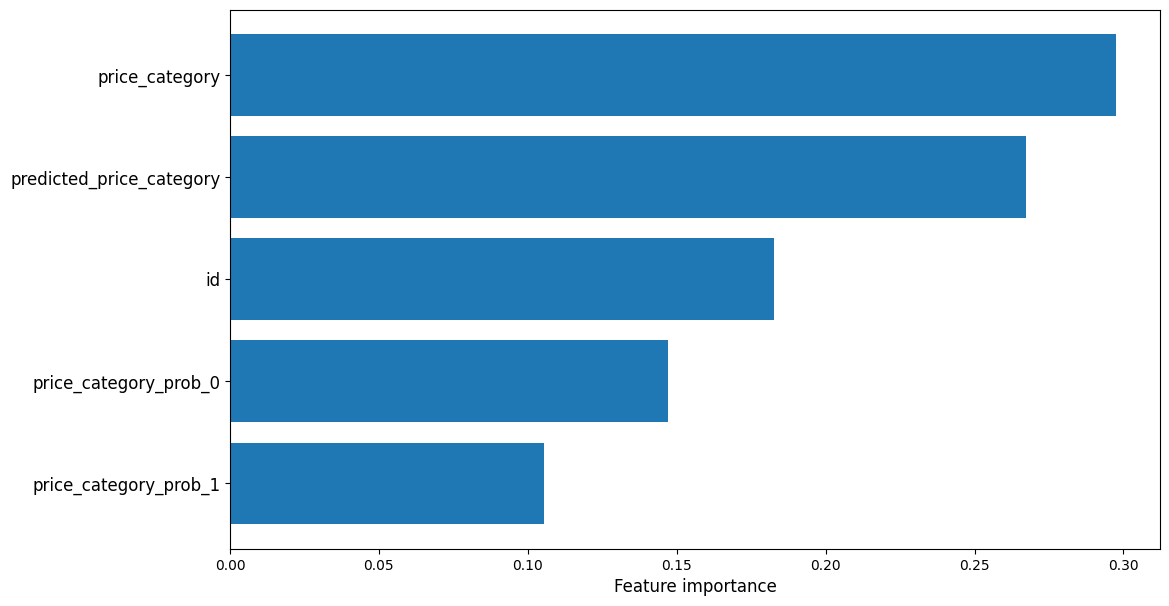

In [32]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = evaluation_file.columns[indices]
importances = importances[indices]

fig, ax = plt.subplots(figsize=(12, 7))
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), features, fontsize=12)
ax.invert_yaxis()
ax.set_xlabel("Feature importance", fontsize=12)

plt.show()

## Confusion matrix

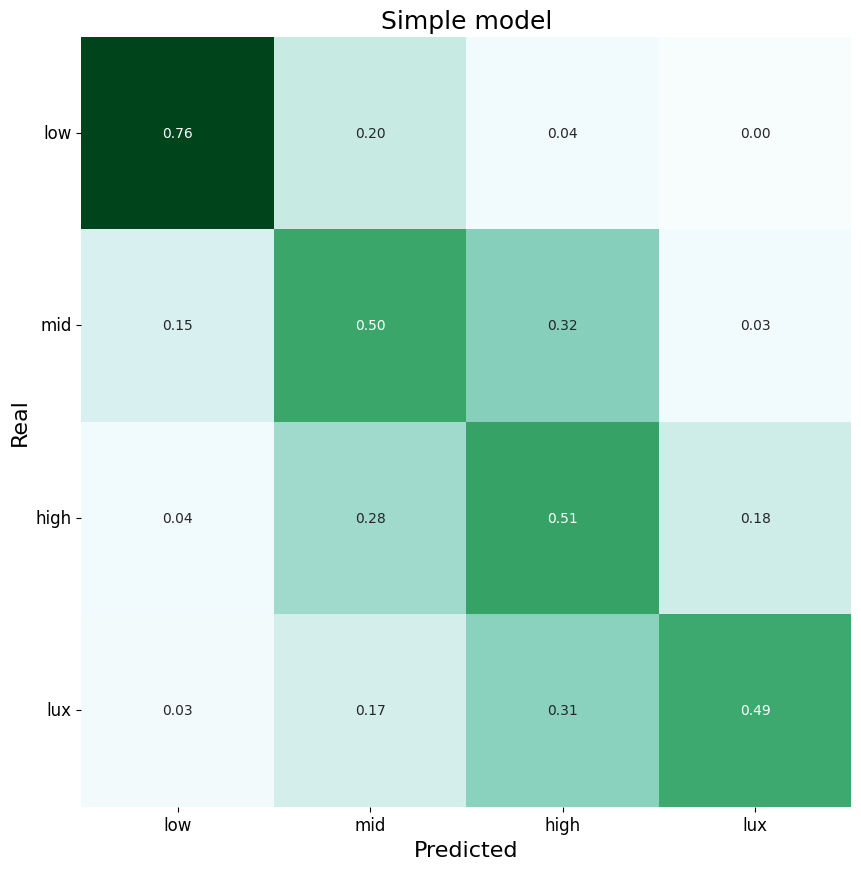

In [33]:
classes = [0, 1, 2, 3]
labels = ['low', 'mid', 'high', 'lux']

c = confusion_matrix(y_test, y_pred)
c = c / c.sum(axis=1).reshape(len(classes), 1)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(c, annot=True, cmap='BuGn', square=True, fmt='.2f', annot_kws={'size': 10}, cbar=False)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Real', fontsize=16)
plt.xticks(ticks=np.arange(.5, len(classes)), labels=labels, rotation=0, fontsize=12)
plt.yticks(ticks=np.arange(.5, len(classes)), labels=labels, rotation=0, fontsize=12)
plt.title("Simple model", fontsize=18)

plt.show()

## Classification report

In [34]:
maps = {'0.0': 'low', '1.0': 'mid', '2.0': 'high', '3.0': 'lux'}

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame.from_dict(report).T[:-3]
df_report.index = [maps[i] for i in df_report.index]
df_report

,precision,recall,f1-score,support
low,0.840909,0.757033,0.796770,1955.0
mid,0.531957,0.495965,0.513331,1611.0
high,0.430901,0.506559,0.465677,991.0
lux,0.305476,0.488479,0.375887,217.0


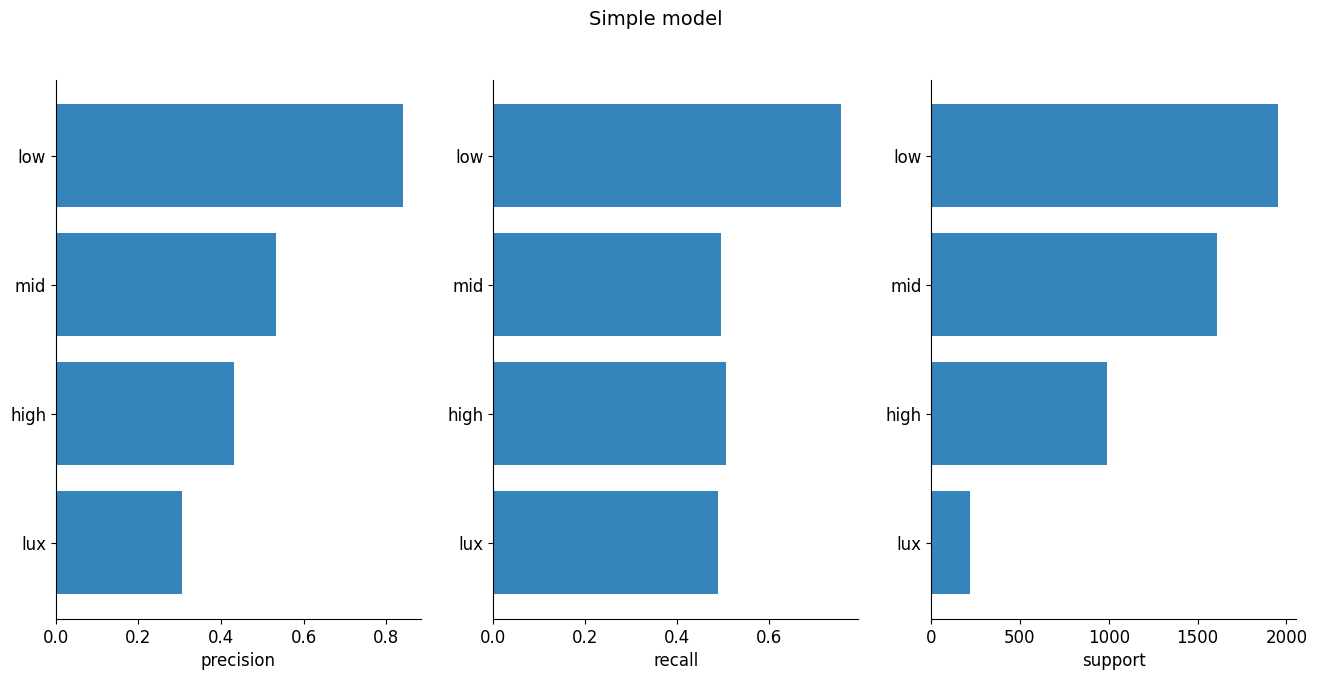

In [35]:
metrics = ['precision', 'recall', 'support']

fig, axes = plt.subplots(1, len(metrics), figsize=(16, 7))

for i, ax in enumerate(axes):

    ax.barh(df_report.index, df_report[metrics[i]], alpha=0.9)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel(metrics[i], fontsize=12)
    ax.invert_yaxis()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.suptitle("Simple model", fontsize=14)
plt.show()